# Sentiment Analysis of WhatsApp Messaging

In [299]:
#!pip install emoji
#!pip install WordCloud

In [507]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import emoji
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import datetime as dt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [609]:
data = pd.read_csv("C:/Users/imoge/Projects/Datasets/Chat.csv",header=None, sep='\n')

In [610]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15899 entries, 0 to 15898
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       15899 non-null  object
dtypes: object(1)
memory usage: 124.3+ KB


In [611]:
data.columns = ["Message"]
data.head()

,Message
0,"[23/09/2017, 21:33:41] HULL: ‎Messages and cal..."
1,"[23/09/2017, 21:33:41] ‎Tegan Hull created thi..."
2,"[17/12/2018, 16:30:33] ‎Tegan Hull added you,,..."
3,"[17/12/2018, 18:26:17] Tegan Hull: Lowena and ..."
4,"[17/12/2018, 18:35:57] Imy Hull: Got to go to ..."


In [612]:
print(data["Message"].iloc[20])

[12/01/2019, 12:52:57] Lowena Hull: Cute,,,,,,


In [613]:
new_data = data["Message"].str.split('\]', expand=True)
new_data.head()

,0,1
0,"[23/09/2017, 21:33:41",HULL: ‎Messages and calls are end-to-end encr...
1,"[23/09/2017, 21:33:41","‎Tegan Hull created this group,,,,,,"
2,"[17/12/2018, 16:30:33","‎Tegan Hull added you,,,,,,"
3,"[17/12/2018, 18:26:17","Tegan Hull: Lowena and mum, r u free to go ic..."
4,"[17/12/2018, 18:35:57",Imy Hull: Got to go to town in the morning an...


In [614]:
# split column by delimiter 
new_data = data["Message"].str.split(':', expand=True)
new_df = pd.DataFrame(new_data[3])
new_df.head(10)

,3
0,‎Messages and calls are end-to-end encrypted....
1,None
2,None
3,"Lowena and mum, r u free to go iceskating tmr..."
4,Got to go to town in the morning and get some...
5,"Ah dw dw,,,,,,"
6,"‎image omitted,,,,,,"
7,Tegan there are chocolate croissants defroste...
8,"😂😂,,,,,,"
9,


In [615]:
# Check for nulls
new_df.isnull().sum()

3    125
dtype: int64

In [616]:
# Replace commas with blank and 'image omitted with nan', then drop nans 
new_df.replace(',','', regex=True, inplace=True)
new_df.replace('image omitted',np.nan, regex=True, inplace=True)
new_df.dropna(inplace = True)
#new_df.reset_index(inplace = True, drop = True)

In [617]:
# Remove blanks with regex
new_df[3].replace(r'^\s*$', np.nan, regex=True,inplace = True)
new_df.dropna(inplace = True)

In [618]:
# Get most frequent phrases
new_df[3].value_counts().sort_values(ascending = False).head()

 ‎video omitted      179
 https               137
 ‎sticker omitted    122
 Lol                 117
 Yes                  86
Name: 3, dtype: int64

In [619]:
# Remove phrases with the words ommitted and https
new_df = new_df[~new_df[3].str.contains("omitted")]
new_df = new_df[~new_df[3].str.contains("https")]

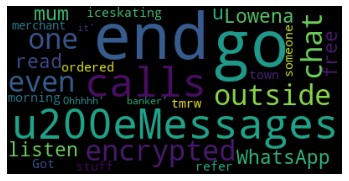

In [620]:
# Create wordcloud of topics discussed
text = new_df[3].values 
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [621]:
sentiments = SentimentIntensityAnalyzer()

In [622]:
new_df["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in new_df[3]]

In [623]:
new_df.head()

,3,Compound
0,‎Messages and calls are end-to-end encrypted....,-0.2960
3,Lowena and mum r u free to go iceskating tmrw?,0.5106
4,Got to go to town in the morning and get some...,0.0000
5,Ah dw dw,0.0000
7,Tegan there are chocolate croissants defroste...,0.0000


In [626]:
new_df = new_df.iloc[1: , :]

In [627]:
new_df.head()

,3,Compound
4,Got to go to town in the morning and get some...,0.0000
5,Ah dw dw,0.0000
7,Tegan there are chocolate croissants defroste...,0.0000
8,😂😂,0.0000
20,Cute,0.4588


In [628]:
new_df["Compound"].mean()

0.0620785023075782

Overall weakly positive sentiment of all conversations

In [629]:
new_df.shape

(13434, 2)

## Does sentiment change over time?

In [705]:
df = data.copy()

In [706]:
df.columns = ["Message"]
df.head()

,Message
0,"[23/09/2017, 21:33:41] HULL: ‎Messages and cal..."
1,"[23/09/2017, 21:33:41] ‎Tegan Hull created thi..."
2,"[17/12/2018, 16:30:33] ‎Tegan Hull added you,,..."
3,"[17/12/2018, 18:26:17] Tegan Hull: Lowena and ..."
4,"[17/12/2018, 18:35:57] Imy Hull: Got to go to ..."


In [707]:
# Split into separate columns, strip remaining brackets
df["Date"] = df["Message"].str.split("\]").str[0]
df2 = df["Date"].str.split(',', expand=True)
df2 = df2[[1,0]]
df2.columns = ["Time","Date"]
df2["Date"] = df2["Date"].apply(lambda x:x.replace("[",""))

In [708]:
# Bring columns together into one column and set to datetime
df2["Datetime"] = pd.DataFrame(df2["Time"]+ " " + df2["Date"])
df2['Datetime']= pd.to_datetime(df2['Datetime'], errors='coerce')
df2.drop(columns = ["Date","Time"],axis = 1,inplace = True)

In [709]:
df2.head()

,Datetime
0,2017-09-23 21:33:41
1,2017-09-23 21:33:41
2,2018-12-17 16:30:33
3,2018-12-17 18:26:17
4,2018-12-17 18:35:57


In [710]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15899 entries, 0 to 15898
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  13780 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 124.3 KB


In [711]:
df2['Month'] = pd.DatetimeIndex(df2['Datetime']).month
df2["Year"] = pd.DatetimeIndex(df2["Datetime"]).year
df2["Day"] = pd.DatetimeIndex(df2["Datetime"]).dayofweek

In [712]:
df2['Day'].replace([0,1,2,3,4,5,6],["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],inplace = True)
df2["Month"].replace([1,2,3,4,5,6,7,8,9,10,11,12],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],inplace = True)

In [713]:
df2.head()

,Datetime,Month,Year,Day
0,2017-09-23 21:33:41,Sep,2017.0,Saturday
1,2017-09-23 21:33:41,Sep,2017.0,Saturday
2,2018-12-17 16:30:33,Dec,2018.0,Monday
3,2018-12-17 18:26:17,Dec,2018.0,Monday
4,2018-12-17 18:35:57,Dec,2018.0,Monday


In [714]:
df2.shape

(15899, 4)

In [715]:
new_df.shape

(13434, 2)

In [716]:
combined = new_df.join(df2).reset_index(drop = True)

In [717]:
combined.head()

,3,Compound,Datetime,Month,Year,Day
0,Got to go to town in the morning and get some...,0.0000,2018-12-17 18:35:57,Dec,2018.0,Monday
1,Ah dw dw,0.0000,2018-12-17 19:16:40,Dec,2018.0,Monday
2,Tegan there are chocolate croissants defroste...,0.0000,2018-12-22 08:53:06,Dec,2018.0,Saturday
3,😂😂,0.0000,2018-12-22 09:25:36,Dec,2018.0,Saturday
4,Cute,0.4588,2019-12-01 12:52:57,Dec,2019.0,Sunday


In [767]:
years = pd.DataFrame(combined.groupby("Year")["Compound"].mean()).reset_index()
years = years.iloc[1: , :]
years

,Year,Compound
1,2019.0,0.084205
2,2020.0,0.063756
3,2021.0,0.058702


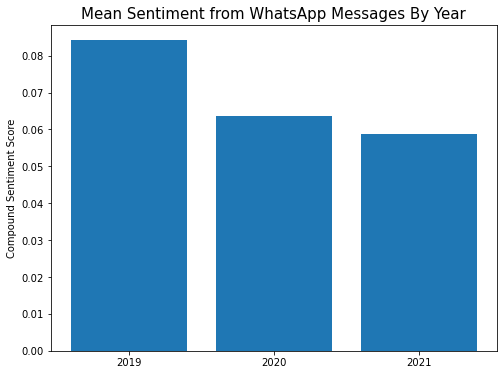

In [777]:
fig, ax = plt.subplots(figsize = (8,6))
year = ["2019","2020","2021"]
ax.bar(year,years.Compound)
ax.set_title("Mean Sentiment from WhatsApp Messages By Year",size = 15)
ax.set_ylabel("Compound Sentiment Score")
plt.show()

In [752]:
days = pd.DataFrame(combined.groupby("Day")["Compound"].mean()).reset_index()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days = days.set_index('Day').reindex(cats).reset_index()
days

,Day,Compound
0,Monday,0.066105
1,Tuesday,0.081153
2,Wednesday,0.067444
3,Thursday,0.036474
4,Friday,0.062308
5,Saturday,0.051288
6,Sunday,0.067578


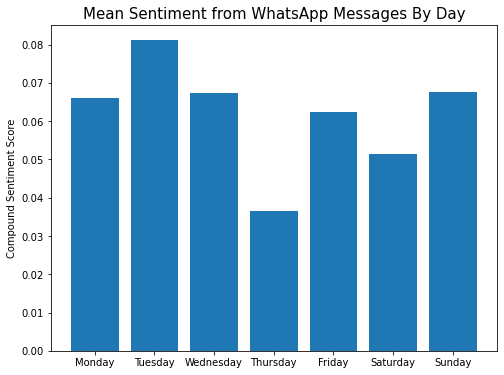

In [778]:
fig, ax = plt.subplots(figsize = (8,6))
ax.bar(days.Day,days.Compound)
ax.set_title("Mean Sentiment from WhatsApp Messages By Day",size = 15)
ax.set_ylabel("Compound Sentiment Score")
plt.show()

In [756]:
months = pd.DataFrame(combined.groupby("Month")["Compound"].mean()).reset_index()
cats = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
months = months.set_index('Month').reindex(cats).reset_index()
months

,Month,Compound
0,Jan,0.071804
1,Feb,0.070790
2,Mar,0.050525
3,Apr,0.064949
4,May,0.059949
5,Jun,0.054212
6,Jul,0.070172
7,Aug,0.056697
8,Sep,0.056497
9,Oct,0.051287


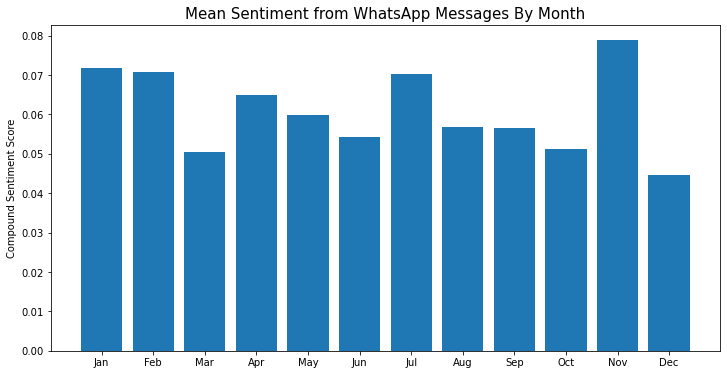

In [779]:
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(months.Month,months.Compound)
ax.set_title("Mean Sentiment from WhatsApp Messages By Month",size = 15)
ax.set_ylabel("Compound Sentiment Score")
plt.show()

## Who is the most miserable family member?

In [813]:
data.head()

,Message
0,"[23/09/2017, 21:33:41] HULL: ‎Messages and cal..."
1,"[23/09/2017, 21:33:41] ‎Tegan Hull created thi..."
2,"[17/12/2018, 16:30:33] ‎Tegan Hull added you,,..."
3,"[17/12/2018, 18:26:17] Tegan Hull: Lowena and ..."
4,"[17/12/2018, 18:35:57] Imy Hull: Got to go to ..."


In [814]:
name = data["Message"].str.split('\]', expand=True)
name.drop(columns = [0],axis = 1, inplace = True)
name.head()

,1
0,HULL: ‎Messages and calls are end-to-end encr...
1,"‎Tegan Hull created this group,,,,,,"
2,"‎Tegan Hull added you,,,,,,"
3,"Tegan Hull: Lowena and mum, r u free to go ic..."
4,Imy Hull: Got to go to town in the morning an...


In [815]:
name2 = name[1].str.split('\:', expand=True)
name2 = name2[[0,1]]
name2.head()

,0,1
0,HULL,‎Messages and calls are end-to-end encrypted....
1,"‎Tegan Hull created this group,,,,,,",None
2,"‎Tegan Hull added you,,,,,,",None
3,Tegan Hull,"Lowena and mum, r u free to go iceskating tmr..."
4,Imy Hull,Got to go to town in the morning and get some...


In [816]:
name2.dropna(inplace = True)
name2 = name2.iloc[1: , :]
name2.head()

,0,1
3,Tegan Hull,"Lowena and mum, r u free to go iceskating tmr..."
4,Imy Hull,Got to go to town in the morning and get some...
5,Tegan Hull,"Ah dw dw,,,,,,"
6,Imy Hull,"‎image omitted,,,,,,"
7,Imy Hull,Tegan there are chocolate croissants defroste...


In [818]:
name2["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in name2[1]]

In [821]:
name2.columns = ["Name","Message","Compound"]

In [825]:
family = name2.groupby("Name")["Compound"].mean().reset_index()
family

,Name,Compound
0,Imy Hull,0.035834
1,Jon Hull,0.026729
2,Lowena Hull,0.019162
3,Tegan Hull,0.030621


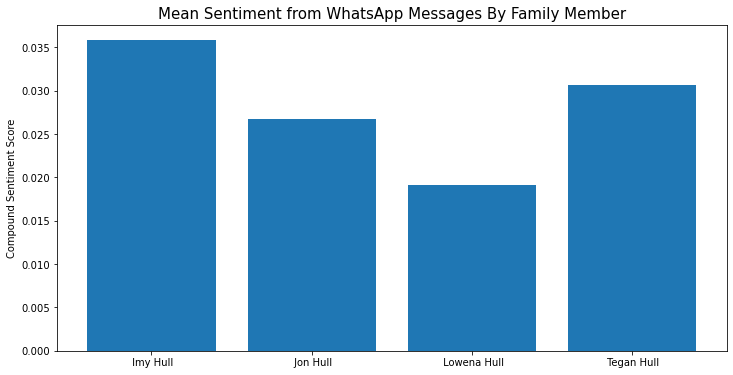

In [826]:
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(family.Name,family.Compound)
ax.set_title("Mean Sentiment from WhatsApp Messages By Family Member",size = 15)
ax.set_ylabel("Compound Sentiment Score")
plt.show()